In [1]:
# just load every module I used
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics 
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
# http://xgboost.readthedocs.io/en/latest/python/python_intro.html
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV 
from pprint import pprint 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from nltk import PorterStemmer
from nltk.stem.snowball import GermanStemmer
from sklearn import preprocessing
import spacy
from scipy import sparse 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
# http://scikit-learn.org/stable/modules/feature_extraction.html
# http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

In [2]:
# read in data and preform simple of empty data and uniquness of the given features
data = pd.read_csv('data.csv', sep=';', low_memory=False)
data


,restaurant_id,restaurant_name,testing,restaurant_description,product_id,variation_id,menu_category,product_name,product_description,price,...,longitude,chain_id,restaurant_active,city_id,dietary_characteristics,cuisine_characteristics,taste_characteristics,preparation_style_characteristics,dish_type_characteristics,ingredients
0,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35039,35037,Fit Pizza,Pizza Margherita,Tomatensauce und fettarmer Käse,6.0,...,8.684631,NaN,1,9,['Lakto-vegetarisch'],"['Gesundes Essen', 'Italienisch']","['Mild', 'Natürlich']",['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Tomaten']"
1,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35040,35038,Fit Pizza,Pizza Salami & Putenschinken,"Fettarme Salami, Putenschinken und fettarmer Käse",8.4,...,8.684631,NaN,1,9,['Lakto-vegetarisch'],"['Gesundes Essen', 'Italienisch']",['Natürlich'],['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Salami', 'Schinken', 'Tomaten']"
2,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35043,35041,Fit Pizza,Pizza Veggie + Rucola,"Pilze, Zwiebeln, Rucola und fettarmer Käse",8.4,...,8.684631,NaN,1,9,"['Lakto-vegetarisch', 'Ohne Rindfleisch', 'Ohn...","['Gesundes Essen', 'Italienisch']","['Mild', 'Natürlich']",['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Pilz', 'Rucola', 'Tomatensau..."
3,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35045,35043,Fit Pizza,Pizza Sucuk Jalapenos,"Fettarme Knoblauchwurst, Jalapenos und fettarm...",8.4,...,8.684631,NaN,1,9,NaN,['Italienisch'],['Natürlich'],['Gebacken'],['Pizza'],['Jalapeño']
4,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35046,35044,Fit Pizza,Pizza Hähnchenbrust,"Magere Hähnchenbruststreifen, Pilze, Zwiebeln ...",8.9,...,8.684631,NaN,1,9,['Halal'],"['Gesundes Essen', 'Italienisch']",['Natürlich'],['Gebacken'],['Pizza'],"['Hähnchenbrustfilet', 'Käse', 'Mehl', 'Tomate..."
5,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35051,35049,Fit Burger,Classic Burger,"Mageres Rindfleisch, Eisbergsalat, Tomaten, Zw...",5.9,...,8.684631,NaN,1,9,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Mild', 'Natürlich']",['Gebraten'],['Burger'],"['Eisbergsalat', 'Gurke', 'Rindfleisch', 'Toma..."
6,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35052,35050,Fit Burger,Cheese Burger,"Mageres Rindfleisch, low fat Käse, Eisbergsala...",6.4,...,8.684631,NaN,1,9,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Mild', 'Natürlich']",['Gebraten'],['Burger'],"['Eisbergsalat', 'Gurke', 'Käse', 'Rindfleisch..."
7,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35053,35051,Fit Burger,Chili Cheese Burger,"Mageres Rindfleisch, Salat, Jalapeños und Fit ...",7.4,...,8.684631,NaN,1,9,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Leicht scharf', 'Natürlich']",['Gebraten'],['Burger'],"['Jalapeño', 'Rindfleisch', 'Salat']"
8,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35059,35057,Fit Beilagen,Fit Pommes,Mit Heißluft frittierte Pommes,2.9,...,8.684631,NaN,1,9,['Vegan'],"['Amerikanisch', 'Gesundes Essen']",['Natürlich'],"['frittiert', 'Gebacken']",['Pommes'],['Kartoffel']
9,453,Fit Kitchen (eat fit),0,Gesundes Fast Food,35060,35058,Fit Beilagen,Fit Coleslaw,Fettarmer Krautsalat,2.9,...,8.684631,NaN,1,9,NaN,['International'],['Natürlich'],['Fusion / Mixed'],['Extra'],['Krautsalat']


In [4]:
print(data.isnull().sum())

restaurant_id                            0
restaurant_name                          0
testing                                  0
restaurant_description                 257
product_id                               0
variation_id                             0
menu_category                            0
product_name                             2
product_description                   3895
price                                    0
postcode                               652
latitude                               224
longitude                              223
chain_id                             61193
restaurant_active                        0
city_id                                  0
dietary_characteristics              53810
cuisine_characteristics              41771
taste_characteristics                41771
preparation_style_characteristics    41771
dish_type_characteristics            41771
ingredients                          41784
dtype: int64


In [4]:
# from this we can see that there is missing data mostly 
# for chain_id so I would not use this column
# as a feature, lots of data is mising for dietary characteristics as for 
# cuisine, taste, preparation, dish type and ingredients
# however I belive that some of this information might 
# be valuable for predictions, for example the ingredients
# I would include data from this columns probably in the latter steps, 
# since it needs to be correctly parsed and mapped first
# and will introduce even more features which I am not able to 
# analyse on my laptop

In [5]:
print('Unique restaurant_id: {}'.format(len(data['restaurant_id'].unique())))
print('Unique restaurant_name: {}'.format(len(data['restaurant_name'].unique())))
print('Unique restaurant_description: {}'.format(len(data['restaurant_description'].unique())))
print('Unique product_id: {}'.format(len(data['product_id'].unique())))
print('Unique variation_id: {}'.format(len(data['variation_id'].unique())))
print('Unique menu_category: {}'.format(len(data['menu_category'].unique())))
print('Unique product_name: {}'.format(len(data['product_name'].unique())))
print('Unique city_id: {}'.format(len(data['city_id'].unique())))
print('Unique postcode: {}'.format(len(data['postcode'].unique())))
print('Unique (longitude, latitude) pairs: {}'.format(\
                len(set(zip(data['longitude'],data['latitude'])))))
print('Inactive restaurants: {}'.format(\
                    data['restaurant_active'].where(\
                    data['restaurant_active']==0).isnull().sum()))
print('Unique prices: {}'.format(len(data['price'].unique())))
print('Minial price: {}'.format(min(data['price'])))
print('Maximal price: {}'.format(max(data['price'])))
print('Mean of price: {}'.format(np.mean(data['price'])))
print('Median of price: {}'.format(np.median(data['price'])))
print('Std of price: {}'.format(np.std(data['price'])))

Unique restaurant_id: 1520
Unique restaurant_name: 1515
Unique restaurant_description: 1314
Unique product_id: 65495
Unique variation_id: 65499
Unique menu_category: 3403
Unique product_name: 45725
Unique city_id: 14
Unique postcode: 279
Unique (longitude, latitude) pairs: 1702
Inactive restaurants: 26657
Unique prices: 730
Minial price: 0.0
Maximal price: 550.0
Mean of price: 8.78614452129
Median of price: 7.0
Std of price: 10.4801397226


In [6]:
# From this we can see that product_id and variation_id 
# basicaly bring no information, i.e are probably sort of database ids
# restaurant_id and restarurant_name are encoding the same information 
# so one can use either, using the id is more clear approach,
# it is catecorized and don't need to be manipulated a lot, but will add more
# feautres if encoded correctly than using text feature extraction on the names
# Restaurants_descripton I suppose would not bring too much significat information too
# So for start as features I am taking menu_category, product_name
# product_description is definitely worth using but migth need more preprocessing
# It is important to note that the price has very big discrepancy between
# the mean and median value, and thus very high standard deviation
# If allowed one can remove the prices with 0 values and the outliers
# The number of uniqe locations of the restaurants is comparable with the number 
# of restorats, probably having more for the chains, so this parametar
# I think is also not much valuable

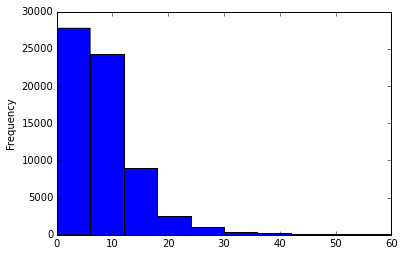

In [7]:
# lets plot the distribution of the data
data['price'].plot.hist(range=(0,60))
# there are few outliers in the price data > 150
# which might be a problem for prediction
# the most of the data is concentrated in the range 0-40e
# the distribution of the price looks like Poisson or log normal distribution"

In [8]:
# Since city_id, postcode and location are categorical values I
# can quickly have a look in their correlation with price
# before I analyse and plot I will endode the data in categorical values
def encode_column(col):
    loc_keys = col.unique()
    loc_vals = range(len(loc_keys))
    loc_dict = {k:v for k,v in zip(loc_keys,loc_vals)}
    col=col.apply(lambda x: loc_dict[x])
    return col

data['location'] = zip(data['longitude'],data['latitude']) 
data['location'] = encode_column(data['location'])
# I noticed there are some names in the postcode
# so remove all chars except numbers
data['postcode'].astype(str).replace({r'[^0-9]':''}, regex=True, inplace=True)
data['postcode'] = encode_column(data['postcode'])
data['city_id'] = encode_column(data['city_id'])
data['restaurant_id'] = encode_column(data['restaurant_id'])
data

,restaurant_id,restaurant_name,testing,restaurant_description,product_id,variation_id,menu_category,product_name,product_description,price,...,chain_id,restaurant_active,city_id,dietary_characteristics,cuisine_characteristics,taste_characteristics,preparation_style_characteristics,dish_type_characteristics,ingredients,location
0,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35039,35037,Fit Pizza,Pizza Margherita,Tomatensauce und fettarmer Käse,6.0,...,NaN,1,0,['Lakto-vegetarisch'],"['Gesundes Essen', 'Italienisch']","['Mild', 'Natürlich']",['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Tomaten']",0
1,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35040,35038,Fit Pizza,Pizza Salami & Putenschinken,"Fettarme Salami, Putenschinken und fettarmer Käse",8.4,...,NaN,1,0,['Lakto-vegetarisch'],"['Gesundes Essen', 'Italienisch']",['Natürlich'],['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Salami', 'Schinken', 'Tomaten']",0
2,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35043,35041,Fit Pizza,Pizza Veggie + Rucola,"Pilze, Zwiebeln, Rucola und fettarmer Käse",8.4,...,NaN,1,0,"['Lakto-vegetarisch', 'Ohne Rindfleisch', 'Ohn...","['Gesundes Essen', 'Italienisch']","['Mild', 'Natürlich']",['Gebacken'],['Pizza'],"['Käse', 'Mehl', 'Pilz', 'Rucola', 'Tomatensau...",0
3,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35045,35043,Fit Pizza,Pizza Sucuk Jalapenos,"Fettarme Knoblauchwurst, Jalapenos und fettarm...",8.4,...,NaN,1,0,NaN,['Italienisch'],['Natürlich'],['Gebacken'],['Pizza'],['Jalapeño'],0
4,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35046,35044,Fit Pizza,Pizza Hähnchenbrust,"Magere Hähnchenbruststreifen, Pilze, Zwiebeln ...",8.9,...,NaN,1,0,['Halal'],"['Gesundes Essen', 'Italienisch']",['Natürlich'],['Gebacken'],['Pizza'],"['Hähnchenbrustfilet', 'Käse', 'Mehl', 'Tomate...",0
5,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35051,35049,Fit Burger,Classic Burger,"Mageres Rindfleisch, Eisbergsalat, Tomaten, Zw...",5.9,...,NaN,1,0,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Mild', 'Natürlich']",['Gebraten'],['Burger'],"['Eisbergsalat', 'Gurke', 'Rindfleisch', 'Toma...",0
6,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35052,35050,Fit Burger,Cheese Burger,"Mageres Rindfleisch, low fat Käse, Eisbergsala...",6.4,...,NaN,1,0,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Mild', 'Natürlich']",['Gebraten'],['Burger'],"['Eisbergsalat', 'Gurke', 'Käse', 'Rindfleisch...",0
7,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35053,35051,Fit Burger,Chili Cheese Burger,"Mageres Rindfleisch, Salat, Jalapeños und Fit ...",7.4,...,NaN,1,0,['Ohne Schweinefleisch'],"['Amerikanisch', 'Gesundes Essen']","['Leicht scharf', 'Natürlich']",['Gebraten'],['Burger'],"['Jalapeño', 'Rindfleisch', 'Salat']",0
8,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35059,35057,Fit Beilagen,Fit Pommes,Mit Heißluft frittierte Pommes,2.9,...,NaN,1,0,['Vegan'],"['Amerikanisch', 'Gesundes Essen']",['Natürlich'],"['frittiert', 'Gebacken']",['Pommes'],['Kartoffel'],0
9,0,Fit Kitchen (eat fit),0,Gesundes Fast Food,35060,35058,Fit Beilagen,Fit Coleslaw,Fettarmer Krautsalat,2.9,...,NaN,1,0,NaN,['International'],['Natürlich'],['Fusion / Mixed'],['Extra'],['Krautsalat'],0


/usr/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


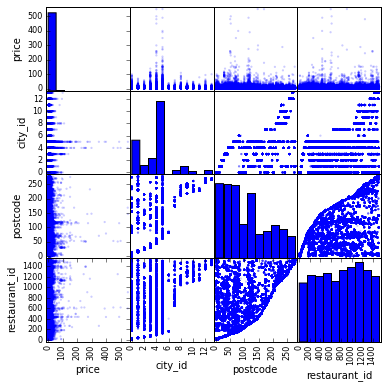

In [9]:
plt.figure()
scatter_matrix(data[['price', 'city_id', 'postcode', 'restaurant_id']], \
               alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()
# scatter plots are not the best way to evaluate categorical data
# but in this case helps deciding which feature to include
# postcode and restaurant id seems bring the same information
# so I will use restaurant_id i.e. name as first selection
# I would start with city_id since it cleary can detect the cities 
# which have high price ranges
# on the other hand looking into the price, might be worth
# removing these outliers... 

city_id
0      8.859622
1      8.020247
2      7.866763
3      9.243218
4     10.374838
5      8.352578
6      8.951942
7      7.110962
8      7.510862
9      8.929326
10     8.213471
11     7.209302
12     7.299817
13     7.589821
dtype: float64
city_id
0     7.5
1     7.1
2     7.5
3     7.5
4     8.5
5     6.0
6     5.9
7     5.9
8     5.9
9     8.0
10    6.8
11    6.0
12    5.9
13    6.5
dtype: float64
city_id
0      6.995574
1      5.536125
2      4.949804
3      9.178261
4     13.700521
5     13.098908
6      7.058375
7      5.139154
8      7.346428
9      5.831879
10     5.995224
11     6.174171
12     6.862750
13     6.097331
dtype: float64


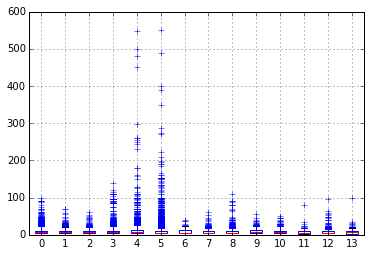

In [10]:
# lets plot some box plots over city_id
# transform the data
grouped=data[['city_id', 'price']].pivot(\
            columns='city_id', index=data.index)
grouped.columns = grouped.columns.droplevel()
print(grouped.mean())
print(grouped.median())
print(grouped.std())
grouped.boxplot()

city_id
0     6.400883
1     5.395256
2     4.877967
3     6.198773
4     6.777670
5     6.402561
6     7.047704
7     5.127356
8     5.341179
9     5.826676
10    5.956580
11    4.979755
12    6.126183
13    5.043182
dtype: float64
city_id
0     8.755340
1     8.003544
2     7.853105
3     8.730590
4     9.684971
5     7.598969
6     8.995610
7     7.146235
8     7.178867
9     8.941138
10    8.330200
11    7.023316
12    7.172830
13    7.462534
dtype: float64
city_id
0     7.5
1     7.1
2     7.5
3     7.5
4     8.5
5     6.0
6     5.9
7     5.9
8     5.9
9     8.0
10    6.9
11    6.0
12    5.9
13    6.5
dtype: float64


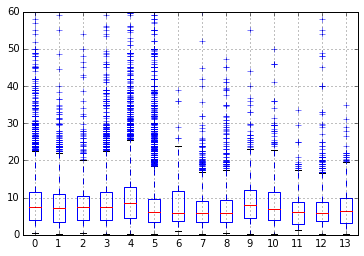

In [11]:
# more or less the distribution of prices across 
# cities is similar, except for 4 and 5 where there
# are some outliers, higher prices, which is evident
# also in the standard deviation value
# chech the same with removed zeros and outliers
grouped_cut=grouped.where((grouped>0.0) & (grouped<60.0))
print(grouped_cut.std())
print(grouped_cut.mean())
print(grouped_cut.median())
# still high std with medians now more similar
grouped_cut.boxplot()

In [12]:
# select the initial dataset which will be trained, remove nans, they are not to many
# so I will just drop them (~18)
test_df = data[['restaurant_name','city_id',\
        'menu_category','product_name','price']].copy()
test_df.dropna(inplace=True)
# I tried also removing outliers and zeros 
# in the price to improve results
# didn't help
# test_df.drop(test_df[(test_df['price']>60) | (test_df['price']<1)].index, inplace=True)
test_df.reset_index(inplace=True)
print(test_df.isnull().sum())
test_df.shape

index              0
restaurant_name    0
city_id            0
menu_category      0
product_name       0
price              0
dtype: int64


(65497, 6)

In [13]:
# As first try I will clean little the menu_category and product_name columns
# which helps a but reducing the dimensionality
# I initialy used the snowball german stemmer but is not doing much for this dataset
# spacy seems better but it is much more time consuming
# however it gave the best results in terms of train-test score

# helper function
def primary_transform(col):
#     col = col.str.encode('ascii', errors='ignore')
    prog = re.compile(r'[^a-zA-Z ]+')
    col = col.apply(lambda x: re.sub(prog,'',str(x)))
    col.replace({r'[^a-zA-Z ]':''}, regex=True, inplace=True)
    col = col.apply(lambda x:GermanStemmer().stem(x))
    col.apply(lambda x: nlp(x))
    return col
test_df['menu_category'] = primary_transform(\
                            test_df['menu_category'])

test_df['product_name'] = primary_transform(\
                            test_df['product_name'])
test_df['restaurant_name'] = primary_transform(\
                            test_df['restaurant_name'])

In [14]:
# lets see how cleaning helped reducing the dimensionality
print(len(data['menu_category'].unique()), len(test_df['menu_category'].unique()))
print(len(data['product_name'].unique()), len(test_df['product_name'].unique()))
print(len(data['restaurant_name'].unique()), len(test_df['restaurant_name'].unique()))

(3403, 3199)
(45725, 41539)
(1515, 1508)


In [21]:
# First I will try with running char 1-grams over the menu_category and product_name
# Here for example I can include also restaurant_name instead of restaurant_id
# Since if I generate dummies over restaurant_id I will get more features 
# than using char 1-gram over restaurant_name
# I can tried with char 2-grams, word 1-grams and word 2-grams (tf-idf)
# helper function
def generate_features(d, vectorizer):
    vect_d = vectorizer.fit_transform(d)
    # next tree lines are not necesary if 
    # I use the sparce matrix only
#     vect_df=pd.DataFrame(vect_d.toarray())
#     prfx = d.name+'_'
#     vect_df.columns= [prfx+str(el) for el in vect_df.columns]
    return sparse.csr_matrix(vect_d)

# lots of hypher-parameter tuning is involved around 
# the vectorizers parameters too, gridSearch can be run too
# I tried playing with min_df and n_features and see 
# how these affect the size of the vocabulary
word_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=1000)
char_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='char',strip_accents='ascii', min_df=0.005)


In [24]:
menu_csr = generate_features(test_df['menu_category'], char_vectorizer)
prod_csr = generate_features(test_df['product_name'], char_vectorizer)
rest_csr = generate_features(test_df['restaurant_name'], char_vectorizer)

print(menu_csr.shape)
print(char_vectorizer.vocabulary_)
print(len(char_vectorizer.vocabulary_))
# I played with min_df for char 2-ngrams in order to 
# get smaller vocabulary and therefore smaller 
# number of features
# I can also return them all and try dimensionality reduction using
# PCA or Kbest to reduce features
# The dimensionality reduction is also too memory intensive on large 60.0000x1.500 data
# so I was able to run ony TruncatedSVD on sparce matrices

(65497, 257)
{u' b': 2, u' c': 3, u'gu': 121, u' a': 1, u' f': 6, u'gr': 120, u' d': 4, u' e': 5, u' j': 10, u' k': 11, u' h': 8, u' i': 9, u' n': 14, u' o': 15, u' l': 12, u' m': 13, u' r': 17, u' s': 18, u' p': 16, u' v': 21, u' w': 22, u' t': 19, u' u': 20, u'go': 119, u'gl': 118, u'gi': 117, u' g': 7, u' ': 0, u'tz': 291, u'ty': 290, u'tt': 288, u'tu': 289, u'tr': 286, u'ts': 287, u'tn': 284, u'to': 285, u'th': 282, u'ti': 283, u'te': 281, u'tc': 280, u'ta': 279, u'g ': 114, u'mb': 184, u'ge': 116, u'p': 233, u't ': 278, u'zo': 330, u'ga': 115, u'ze': 328, u'za': 326, u'zb': 327, u' z': 24, u'zz': 332, u'zu': 331, u' y': 23, u'ko': 164, u'v': 307, u'z ': 325, u'k': 158, u'm ': 182, u'vi': 310, u'me': 185, u'ma': 183, u'f': 103, u'mm': 187, u'mo': 188, u'mi': 186, u'mu': 190, u'mp': 189, u'my': 191, u'f ': 104, u'o': 210, u's ': 266, u'fr': 111, u'fu': 112, u'fa': 105, u'fe': 106, u'ff': 107, u'fi': 108, u'fl': 109, u'fo': 110, u'a': 25, u'ss': 274, u'sp': 273, u'su': 276, u'st': 27

In [25]:
# Another approach is to pack all text data in one field and use this 
# merged field to perform feature extraction 
# This approach is more clean but we now add dependency between the
# fields we are merging 
# Here it probably makes sense to include test_df['product_description'] too
# but I din't manage to test it 
texts = test_df['restaurant_name'] + ' '+ test_df['menu_category'] + ' ' \
    + test_df['product_name'] 
texts[0]

u'fit kitchen eat fit fit pizza pizza margherita'

In [ ]:
# running it throug spacy, time consuming
# might be worth looking into the lemas of 
# the words and using them, not only the stems
texts_nlp = list(map(nlp, texts))
print(texts_nlp[0])

In [ ]:
# return back to strings
texts_str = lstt(map(str, texts))

In [123]:
# aplly tf_idf vectorizer with 1&2 grams
text_feats = word_vectorizer(texts_str, 1, 2)
print(text_feats.shape)
print(word_vectorizer.vocabulary_)
print(len(word_vectorizer.vocabulary_))

(65481, 19342)
(65481, 19356)


In [50]:
def get_col_dummies(col):
    d_df = pd.get_dummies(col)
    prfx = col.name+'_'
    d_df.columns= [prfx+str(el) for el in d_df.columns]
    d_df.reset_index(inplace=True)
    d_df.drop(labels=['index'], axis=1,inplace=True)
    return d_df
# restaurant_id = get_col_dummies(test_df['restaurant_id'])
city_id = get_col_dummies(test_df['city_id'])
# I will need the sparse matrix too
cid_csr = sparse.csr_matrix(city_id.values)
# print restaurant_id.shape
# restaurant_id encoded will add 1520 new features 
# so i will now try with the nam
print(city_id.shape)

(65497, 14)


In [51]:
# used for for the char 2-grams
# selected 964 features

# helper varaible to select which tokenizer to use
# idealy I would have a pipeline combined with 
# gridSearch 
use_texts = False
if not use_texts:
    X = sparse.hstack((cid_csr, menu_csr, prod_csr, rest_csr))
else:
    X = sparse.hstack([cid_csc, text_feats])
# non sparse representation of the features
# feasible only for the 1-char grams
# X = pd.concat((menu_df, prod_df, rest_df, city_id), axis=1)
X

<65497x964 sparse matrix of type '<class 'numpy.int64'>'
	with 4081410 stored elements in COOrdinate format>

In [57]:
# set lables 
y = test_df['price'].values

In [59]:
# set some split parameters which I can tune
# I will split now to train and test, but I will perform
# cross validation that will internaly use my train set 
# for train-test cross validations
# The test set I will use as final, unseen validation set
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_test

<6550x964 sparse matrix of type '<class 'numpy.int64'>'
	with 408908 stored elements in Compressed Sparse Row format>

In [60]:
# normalize the training data
min_scale = MinMaxScaler()
# for sparse data
abs_scaler = MaxAbsScaler()
def scale_data(d, scaler):
    d = scaler.fit_transform(d)
    return d

# normalize training and testing data
# independently so we dont include knowledge
# from the train in the test
X_train = scale_data(X_train, abs_scaler)
X_test = scale_data(X_test, abs_scaler)
X_test

<6550x964 sparse matrix of type '<class 'numpy.float64'>'
	with 408908 stored elements in Compressed Sparse Row format>

In [61]:
# I implemented a decomposer function
# but I was not able to work with them a lot
# PCA cant use sparse matrices and fails in memory
# if I use the dense format
# On my laptop truncatedSVD was also giving 
# memory error, I have only 4gb ram
# But definitely worth tying and tunning 
# the number of components 
def decompose(d_tr, d_te, decomposer):
    decomp = decomposer.fit(d_tr)
    # components = decomp.reshape((decomp.n_components, d.shape[0], d.shape[1]))
    d_tr = decomposer.transform(d_tr)
    d_te = decomposer.transform(d_te)
    return d_tr, d_te
# X_tr, X_te = decompose(X_train, X_test, TruncatedSVD(n_components=1000))
# ch2 = SelectKBest('chi2', n_components)
# pca = PCA(n_components=1000,whiten=True)
# tsvd = TruncatedSVD(n_components=1000)

In [62]:
# helper function to calculate mean
# absolute error on the predictions
# is not sensitive on outliers so
# its what I want for now
def calc_mae(y, y_pred):
    s = 0.0
    for real, pred in zip(y,y_pred):
        s+=abs(real-pred)
    return s/y.shape[0]

In [65]:
# out of curiosity lets try dummy regressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
print(dummy.score(X_train, y_train)) 
print(dummy.score(X_test, y_test))
y_pred_dummy = dummy.predict(X_test)
print(calc_mae(y_test, y_pred_dummy))
# 0.0
# -4.60667813531e-05
# 4.99922347886
# gives memory error for char 2-grams

0.0
-9.31442919523e-05
4.96109941387


In [66]:
# now I can try several regressors
# lets start with the simplest one
# ridge regression with leave-one-out cv
# and cv=3 both very bad results!
# It works only with dense data 
ridge = RidgeCV()
ridge.fit(X_train.todense(), y_train)
# print ridge.score(X_train, y_train)
# print ridge.score(X_test, y_test)
# y_pred_ridge = ridge.predict(X_test)
# print calc_mae(y_test, y_pred_ridge)
# 1-char grams, cv=3
# train: 0.124112973512
# test: 0.114624232585
# mae: 4.50893331164
# 2-char grams, leave-one-out
# train: 0.34640474293700985
# test: 0.22891028686097625
# mae: 4.9007535917416138

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [30]:
# Next I decided to try more addvanced algorithms
# and my first choise where the ensemble trees like RandomFores
# The results where significatly better then Ridge but 
# still not statisfactory, overfitiing for the char-1 grams was evident
# worth trying more hypher-parameter tunning
rf_cv=GridSearchCV(RandomForestRegressor(), cv=3, param_grid={
        'n_estimators':[100,150],
        'max_depth':[4,6,10]
})
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150], 'max_depth': [4, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
best_rf=rf_cv.best_estimator_

In [33]:
print(best_rf)
print(best_rf.score(X_train, y_train))
print best_rf.score(X_test, y_test))
y_pred_rf=best_rf.predict(X_test)
print(calc_mae(y_test, y_pred_rf))
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#            oob_score=False, random_state=None, verbose=0, warm_start=False)
# 0.667579015613
# 0.394838850379
# 3.44751040869
# xgboost is better
# char 1&2 grams
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
#            oob_score=False, random_state=None, verbose=0, warm_start=False)
# 0.56447326393
# 0.444221026302
# 3.39431424827

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.667579015613
0.394838850379
3.44751040869


In [ ]:
# Next I tried XGBoostRegressor since is one of the best methods
# widely used in the ML comppetitions and with greath performance
# I played with the parameters of XGBoost and I noted that aways
# the largest max_dept and n_estimators are laways selected
# so I increased the values on the next runs
# learning rate was always selected 0.1 on the grid search
# https://arxiv.org/pdf/1603.02754.pdf
xgb_cv = GridSearchCV(XGBRegressor(), cv=3, param_grid={
            'max_depth': [15, 20], # [3,10], 
            'learning_rate': [0.1], #[0.1, 1], 
            'n_estimators': [150,200,250] #[50,100,150]
            })
xgb_cv.fit(X_train, y_train)
best=xgb_cv.best_estimator_

In [67]:
print(best)
# with char 1&2-gram
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [68]:
print(xgb_cv.cv_results_)

{'std_train_score': array([ 0.03744393,  0.03584124,  0.0313971 ,  0.01310336,  0.00727452,
        0.00412107,  0.01617212,  0.01025015,  0.00575816,  0.00385936,
        0.00438984,  0.00454272]), 'rank_test_score': array([12,  6,  4,  3,  2,  1, 11,  7,  5,  8,  9, 10], dtype=int32), 'param_max_depth': masked_array(data = [3 3 3 10 10 10 3 3 3 10 10 10],
             mask = [False False False False False False False False False False False False],
       fill_value = ?)
, 'split1_train_score': array([ 0.4491584 ,  0.53541028,  0.59754317,  0.85690959,  0.91165856,
        0.93369041,  0.68103722,  0.77272039,  0.82370649,  0.96124111,
        0.97446404,  0.97730134]), 'split2_train_score': array([ 0.50831732,  0.59404539,  0.63777812,  0.8710618 ,  0.92120455,
        0.94134851,  0.72063442,  0.79446123,  0.83052988,  0.9666595 ,
        0.97828065,  0.98106744]), 'std_score_time': array([ 0.0034361 ,  0.00620797,  0.00288843,  0.00742876,  0.01362832,
        0.0181058 ,  0.00500

In [69]:
print(best.score(X_train, y_train))
# with showball german stemmer, with outliers
# char 1-gram 0.933472167842
# char 1&2-grams 0.92853410091
# word 1&2-grams 0.92853410090971755????
# no change with vut price outliers 0.913453790121
# spacy on fields and more hypher param on xgboost
# 0.972877936502

0.92853410091


In [70]:
print(best.score(X_test, y_test))
# with showball german stemmer, with outliers
# char 1-gram 0.412783157566
# char 1&2-gram 0.558655700322 # still overfitting
# word 1&2-grams 0.55865570032201683????
# char 1&2-gram without outliers 0.593696438793
# char 1&2-gram 0.773766965284 with spacy 

0.558655700322


In [71]:
y_pred_xgb=best.predict(X_test)
print(calc_mae(y_test, y_pred_xgb))
# with showball german stemmer, with outliers
# char 1-gram 2.78123641425
# at least better than rdige, we can tip 2.7eur :D
# evident overfitting
# char 2-gram 2.54247458012
# word 1&2-grams 2.54247458012????
# char 1&2-gram without outliers 2.69092947069 
# char 1&2-gram with spacy and without outliers 1.80522918832 

2.54247458012
